In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [67]:
# Load the CSV file
file_path = 'C:\\Users\\dell0\\Downloads\\Leads.csv'
data = pd.read_csv(file_path)
# Drop rows with NaN values in critical columns
data.dropna(subset=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Last Notable Activity'], inplace=True)

# Set 'Lead Number' as the index
data.set_index('Lead Number', inplace=True)

# Display the first few rows and information about the dataset
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [68]:
# Check for NaN values in each column
nan_counts = data.isnull().sum()
print("Number of NaN values in each column:\n", nan_counts)


Number of NaN values in each column:
 Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                           

In [81]:
# Fill NaN values in the 'Last Notable Activity' column if any
data['Last Notable Activity'].fillna('unknown', inplace=True)  # Filling NaNs with 'unknown' or handle as needed

# Ensure the column is of type string
data['Last Notable Activity'] = data['Last Notable Activity'].astype(str)

# Fit the label encoder on the existing data categories for Last Notable Activity
label_encoder = LabelEncoder()
label_encoder.fit(data['Last Notable Activity'].str.lower())  # Fit with lowercase values

X = data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity']]  # Include encoded feature
y = data['Converted']  # Target
# Handle missing values using SimpleImputer (fill missing values with the mean)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [82]:
# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [83]:
# Define the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV on the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [84]:
# Make predictions using the best model
y_pred = best_model.predict(X_test)

In [85]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')


In [86]:
# 7. Confusion Matrix and Other Performance Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)
#print("Classification Report:\n", report)

Accuracy: 0.78
Precision: 0.79
Recall: 0.78
F1-Score: 0.78
Confusion Matrix:
 [[917 243]
 [162 499]]


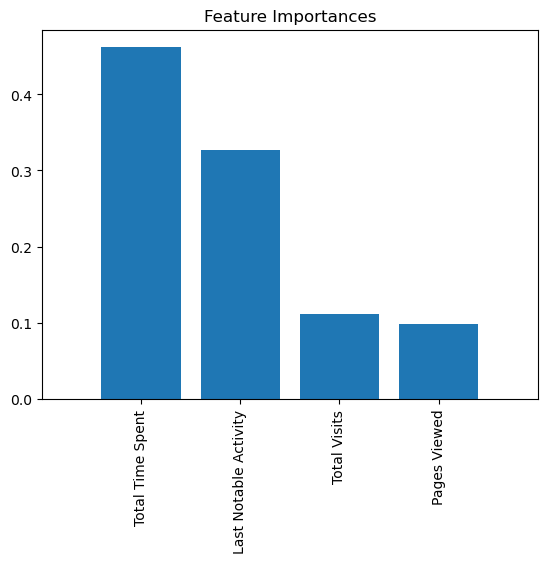

In [87]:
# Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = ['Total Visits', 'Total Time Spent', 'Pages Viewed','Last Notable Activity']  # Update if you have more features
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'C:\\Users\\dell0\\Downloads\\Leads.csv'
data = pd.read_csv(file_path)

# Fill NaN values in the 'Last Notable Activity' column if any
data['Last Notable Activity'].fillna('unknown', inplace=True)  # Filling NaNs with 'unknown'

# Ensure the column is of type string
data['Last Notable Activity'] = data['Last Notable Activity'].astype(str)

# Fit the label encoder on the existing data categories for Last Notable Activity
label_encoder = LabelEncoder()
label_encoder.fit(data['Last Notable Activity'].str.lower())  # Fit with lowercase values

def predict_conversion():
    print("Enter the following details:")
    
    # Collect user input
    total_visits = float(input("Total Visits: "))  # H
    total_time_spent = float(input("Total Time Spent (in seconds): "))  # I
    pages_viewed = float(input("Pages Viewed: "))  # Pages Viewed
    last_notable_activity = input("Last Notable Activity : ").lower()  # Convert input to lowercase

    # Check if the entered activity is valid
    if last_notable_activity not in label_encoder.classes_:
        print("Error: The entered activity is not valid. Please use one of the following:")
        print(label_encoder.classes_)  # Show valid options (string categories, not numbers)
        return

    # Encode the Last Notable Activity input
    encoded_activity = label_encoder.transform([last_notable_activity])[0]

    # Create a DataFrame for the input
    user_data = pd.DataFrame([[total_visits, total_time_spent, pages_viewed, encoded_activity]], 
                              columns=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity'])

    # Handle missing values (if any, though unlikely in user input)
    user_data = imputer.transform(user_data)  # Assuming imputer is defined and fitted

    # Make prediction
    prediction = best_model.predict(user_data)

    # Output the result
    if prediction[0] == 1:
        print("The user is likely to convert as a customer.")
    else:
        print("The user is unlikely to convert as a customer.")



In [100]:
# Call the prediction function
predict_conversion()

Enter the following details:


Total Visits:  6
Total Time Spent (in seconds):  100
Pages Viewed:  2
Last Notable Activity :  email opened


The user is unlikely to convert as a customer.
